# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [55]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/manishrajkarnikar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [56]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [57]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [58]:
# # Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy")


# Print total articles
print(f"Total articles about bitcoin: {bitcoin_news['totalResults']}")

# Show sample article
bitcoin_news["articles"][0]

Total articles about bitcoin: 7291


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Elizabeth Lopatto',
 'title': 'If you’re a Russian YouTuber, how do you get paid now?',
 'description': 'Russian creators are shut off from the global financial system. Some of them are turning to cryptocurrency.',
 'url': 'https://www.theverge.com/2022/3/17/22982122/russia-youtube-crypto-creators-pay-ruble',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/MG_NhB7wSIBIl3S_LG-y-r7iPmg=/0x215:3000x1786/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/9442221/cryptocurrency_0004__00000_.jpg',
 'publishedAt': '2022-03-17T13:33:43Z',
 'content': 'When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars]'}

In [59]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy")

# Print total articles
print(f"Total articles about bitcoin: {ethereum_news['totalResults']}")

# Show sample article
bitcoin_news["articles"][0]

Total articles about bitcoin: 3541


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Elizabeth Lopatto',
 'title': 'If you’re a Russian YouTuber, how do you get paid now?',
 'description': 'Russian creators are shut off from the global financial system. Some of them are turning to cryptocurrency.',
 'url': 'https://www.theverge.com/2022/3/17/22982122/russia-youtube-crypto-creators-pay-ruble',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/MG_NhB7wSIBIl3S_LG-y-r7iPmg=/0x215:3000x1786/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/9442221/cryptocurrency_0004__00000_.jpg',
 'publishedAt': '2022-03-17T13:33:43Z',
 'content': 'When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars]'}

In [60]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_news_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)  #the VADER sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        bitcoin_news_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu

        })

    except AttributeError:
        pass

# Create DataFrame
bitcoin_news_sentiments_df = pd.DataFrame(bitcoin_news_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_news_sentiments_df = bitcoin_news_sentiments_df[cols]

bitcoin_news_sentiments_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000
1,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831
2,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887
3,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000
4,2022-03-08,Whose side is cryptocurrency on? If you had as...,-0.3182,0.055,0.091,0.854


In [61]:
# Create the Ethereum sentiment scores DataFrame
ethereum_news_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)  #the VADER sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        ethereum_news_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu

        })

    except AttributeError:
        pass

# Create DataFrame
ethereum_news_sentiments_df = pd.DataFrame(ethereum_news_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_news_sentiments_df = ethereum_news_sentiments_df[cols]

ethereum_news_sentiments_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
3,2022-03-13,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713
4,2022-03-03,"It seems that in 2022, you cant escape from th...",-0.1326,0.000,0.044,0.956


In [62]:
# Describe the Bitcoin Sentiment
bitcoin_news_sentiments_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.001295,0.047700,0.043750,0.908500
std,0.406381,0.045767,0.061198,0.071992
min,-0.771300,0.000000,0.000000,0.739000
25%,-0.231275,0.000000,0.000000,0.861500
50%,0.000000,0.051500,0.000000,0.918000
75%,0.345300,0.075750,0.071000,0.952500
max,0.636900,0.152000,0.187000,1.000000


In [63]:
# Describe the Ethereum Sentiment
ethereum_news_sentiments_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.190925,0.078750,0.02975,0.89145
std,0.401422,0.085383,0.04006,0.10092
min,-0.526700,0.000000,0.00000,0.69200
25%,0.000000,0.000000,0.00000,0.84100
50%,0.025800,0.066500,0.00000,0.91050
75%,0.514625,0.120500,0.06125,1.00000
max,0.834000,0.249000,0.11500,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [64]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [96]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [89]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)

    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]

    return tokens

In [98]:
# Create a new tokens column for Bitcoin

bitcoin_news_sentiments_df['tokens']= bitcoin_news_sentiments_df['text'].apply(tokenizer)


,date,text,compound,positive,negative,neutral,tokens
0,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000,"[russia, invaded, ukraine, niki, proshin, wa, ..."
1,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831,"[bitcoin, wa, seen, many, libertarianleaning, ..."
2,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887,"[feb, reuters, bitcoin, miner, feeling, heat, ..."
3,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000,"[march, reuters, bitcoin, ha, leapt, since, ru..."
4,2022-03-08,Whose side is cryptocurrency on? If you had as...,-0.3182,0.055,0.091,0.854,"[whose, side, cryptocurrency, asked, satoshi, ..."
5,2022-03-05,Getty\r\nWelcome to Nonfungible Tidbits. Our f...,-0.6808,0.074,0.187,0.739,"[gettywelcome, nonfungible, tidbits, focus, we..."
6,2022-03-19,Here's what happened this week in the crypto w...,0.4588,0.081,0.000,0.919,"[heres, happened, week, crypto, worldgettywelc..."
7,2022-02-19,An appeals court decided shilling for an unreg...,0.3400,0.066,0.000,0.934,"[appeal, court, decided, shilling, unregistere..."
8,2022-02-28,Nurphoto/Getty\r\nAs Russia launched an invasi...,0.1280,0.048,0.000,0.952,"[nurphotogettyas, russia, launched, invasion, ..."
9,2022-03-04,"LONDON, March 4 (Reuters) - Cryptocurrencies h...",-0.1280,0.000,0.046,0.954,"[london, march, reuters, cryptocurrencies, clo..."


In [101]:
# Create a new tokens column for Ethereum
ethereum_news_sentiments_df['tokens']= ethereum_news_sentiments_df['text'].apply(tokenizer)
ethereum_news_sentiments_df

,date,text,compound,positive,negative,neutral,tokens
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848,"[february, shit, hit, fan, usual, way, old, tw..."
1,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[coinbase, reported, share, trading, volume, e..."
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917,"[illustration, james, bareham, verge, million,..."
3,2022-03-13,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713,"[sound, good, true, youre, wrong, yield, farmi..."
4,2022-03-03,"It seems that in 2022, you cant escape from th...",-0.1326,0.000,0.044,0.956,"[seems, cant, escape, metaversefrom, facebook,..."
5,2022-03-02,The cryptocurrency boom over the past few year...,0.0000,0.000,0.000,1.000,"[cryptocurrency, boom, past, year, ha, helped,..."
6,2022-02-24,A version of this article was published in TIM...,0.0000,0.000,0.000,1.000,"[version, article, wa, published, times, newsl..."
7,2022-03-09,Joe Biden is dipping his toes into crypto. On ...,0.5267,0.108,0.000,0.892,"[joe, biden, dipping, toe, crypto, wednesday, ..."
8,2022-03-16,The cryptocurrency boom over the past few year...,0.0000,0.000,0.000,1.000,"[cryptocurrency, boom, past, year, ha, helped,..."
9,2022-03-09,The cryptocurrency boom over the past few year...,0.0000,0.000,0.000,1.000,"[cryptocurrency, boom, past, year, ha, helped,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [69]:
from collections import Counter
from nltk import ngrams

In [110]:
# Generate the Bitcoin N-grams where N=2
bitcoin_news_sentiments_df['bigram_counts'] = [Counter(ngrams(tokens, n=2)) for tokens in bitcoin_news_sentiments_df.tokens]




In [111]:
# Generate the Ethereum N-grams where N=2
ethereum_news_sentiments_df['bigram_counts'] = [Counter(ngrams(tokens, n=2)) for tokens in ethereum_news_sentiments_df.tokens]


In [114]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [125]:
# Use token_count to get the top 10 words for Bitcoin
all_bitcoin_tokens = []
for tokens in bitcoin_news_sentiments_df.tokens:
    all_bitcoin_tokens += tokens
top_10_words_for_bitcoin = token_count(all_bitcoin_tokens,10)
top_10_words_for_bitcoin

[('char', 20),
 ('bitcoin', 11),
 ('reuters', 7),
 ('russia', 5),
 ('march', 5),
 ('ha', 4),
 ('week', 4),
 ('crypto', 4),
 ('salvador', 4),
 ('ukraine', 3)]

In [122]:
# Use token_count to get the top 10 words for Ethereum
all_ethereum_tokens = []
for tokens in ethereum_news_sentiments_df.tokens:
    all_ethereum_tokens += tokens
top_10_words_for_ethereum = token_count(all_ethereum_tokens,10)
top_10_words_for_ethereum

[('char', 20),
 ('ha', 7),
 ('past', 7),
 ('ethereum', 6),
 ('volume', 5),
 ('cryptocurrency', 5),
 ('hit', 4),
 ('year', 4),
 ('million', 4),
 ('billion', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

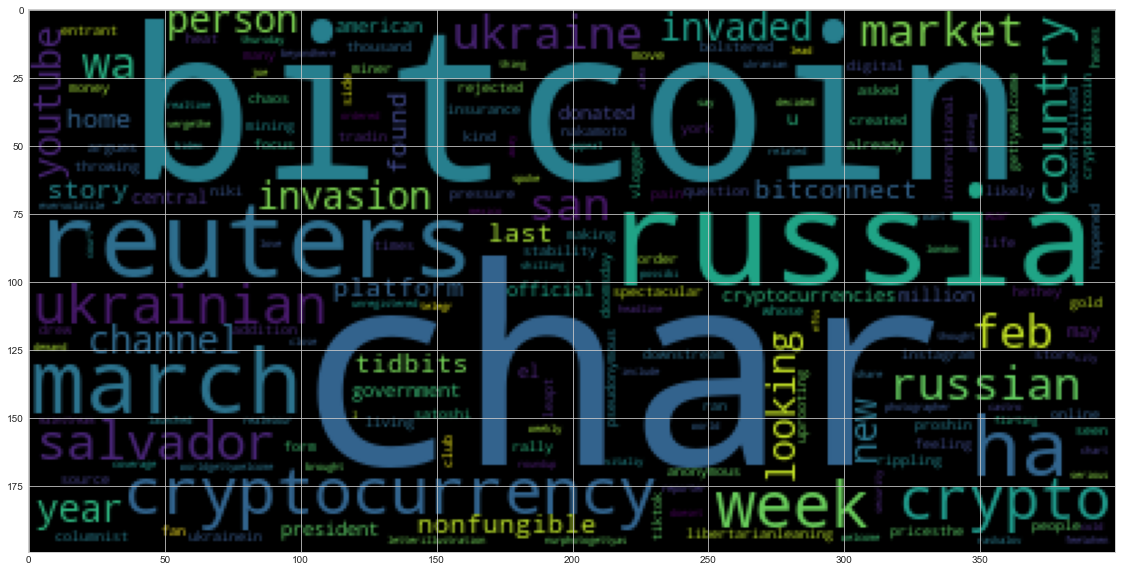

In [127]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(all_bitcoin_tokens))
plt.imshow(wc)

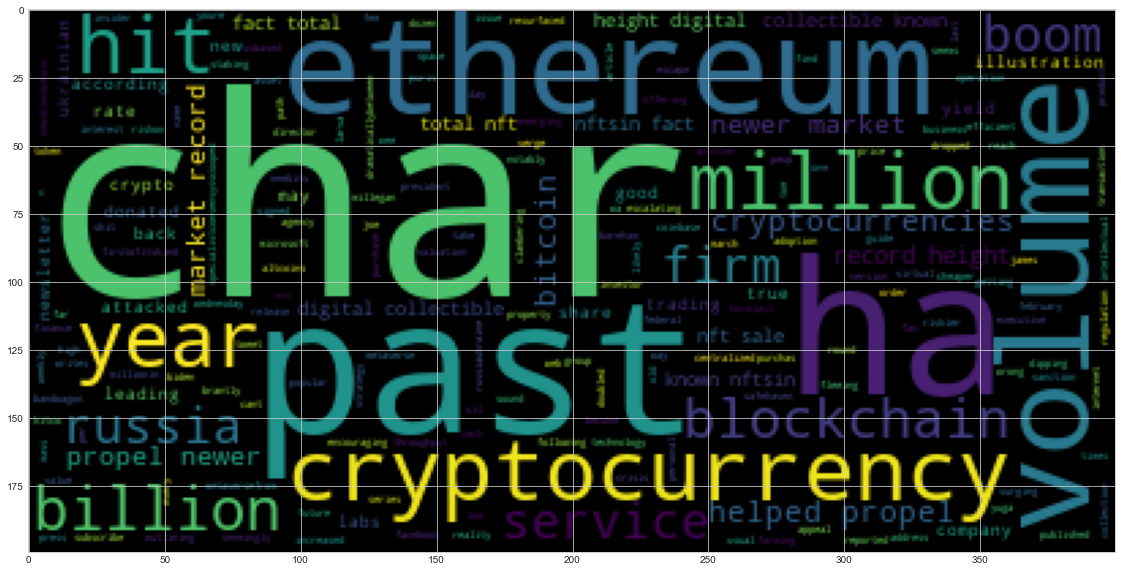

In [128]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(all_ethereum_tokens))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [129]:
import spacy
from spacy import displacy

In [130]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [131]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [144]:
# Concatenate all of the Bitcoin text together
all_bitcoin_news=' '.join(bitcoin_news_sentiments_df.text)

In [145]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(all_bitcoin_news)



# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"


In [146]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [147]:
# List all Entities
bitcoin_doc_ents = set([ent.text for ent in bitcoin_doc.ents ])
bitcoin_doc_ents

{'$2.4 billion',
 '2008',
 '2013',
 '2021',
 'Alex Castro',
 'BITCOIN',
 'BitConnect',
 'Bitcoin',
 'Bitcoin 2013',
 'Central American',
 'Congress',
 'El Salvador',
 'Feb 20',
 'Feb 22',
 'Getty\r\nWelcome to',
 'Instagram',
 'James Bareham',
 'Joe Biden',
 'LONDON',
 'Law firms</li><li>\r\n',
 'March 1',
 'March 11',
 'March 15',
 'March 4',
 'Mexico City',
 'More than $15 million',
 'Motherboard',
 'Nayib Bukele',
 'Niki Proshin',
 'Nonfungible Tidbits',
 'Nurphoto/Getty',
 'Ponzi',
 'Reuters',
 'Russia',
 'Russian',
 'Russians',
 'SAN SALVADOR',
 'SEC',
 'San Jose',
 'Satish Kumbhani',
 'Satoshi Nakamoto',
 'Summary</li><li>',
 'Sunday',
 'Telegr',
 'TikTok',
 'Tom Lee',
 'Tuesday',
 'U.S.',
 'Ukraine',
 'Ukrainian',
 'Ukrainians',
 'Ukranian',
 'Verge',
 'YouTube',
 'a year',
 'between March 15 and 20',
 'documents</li></ul',
 'first',
 'last Thursday',
 'last week',
 'one',
 'only 9 years',
 'the New York Times',
 'this week',
 'thousands',
 'two-week',
 'weekly'}

---

### Ethereum NER

In [148]:
# Concatenate all of the Ethereum text together
all_ethereum_news=' '.join(ethereum_news_sentiments_df.text)

In [151]:
# Run the NER processor on all of the text
ethereum_doc = nlp(all_ethereum_news)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [152]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [153]:
# List all Entities
ethereum_doc_ents = set([ent.text for ent in ethereum_doc.ents ])
ethereum_doc_ents

{'$23 billion',
 '$450 million',
 '2022',
 'American Express',
 'Between 2020 and 2021',
 'Binance',
 'Bitcoin, Ethereum',
 'Bloomberg',
 'Coinbase',
 'Dado Ruvic/Illus',
 'DogeCoin',
 'ENS',
 'Elliptic',
 'Ethereum',
 'Ethereum Name Service',
 'Facebook',
 'February',
 'Getty Images',
 'James Bareham',
 'Joe Biden',
 'June 28, 2021',
 'Larva Labs',
 'March 11',
 'May 201',
 'Meebits',
 'Microsoft',
 'More than $15 million',
 'NFT',
 'REUTERS',
 'Russia',
 'Series',
 'TIME',
 'Tuesday',
 'US',
 'Ukraine',
 'Ukrainian',
 'Wednesday',
 'Yuga Labs',
 'first',
 'last year',
 'more than $4 million',
 'more than a dozen',
 'nearly $55 million',
 'over $7 billion',
 'the days',
 'the past few years',
 'weekly'}

---